In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
clean_df = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')

In [3]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     10689 non-null  int64 
 1   region                         10689 non-null  object
 2   customer_lifetime_value        10689 non-null  int64 
 3   response                       10689 non-null  object
 4   coverage                       10689 non-null  object
 5   education                      10689 non-null  object
 6   effective_to_date              10689 non-null  object
 7   month                          10689 non-null  object
 8   employment_status              10689 non-null  object
 9   gender                         10689 non-null  object
 10  income                         10689 non-null  int64 
 11  location_code                  10689 non-null  object
 12  marital_status                 10689 non-null  object
 13  m

In [4]:
numerical = clean_df.select_dtypes('int64')
numerical.describe()

Unnamed: 0  customer_lifetime_value        income  \
count  10689.000000             10689.000000  10689.000000   
mean    5344.000000              8011.906727  51757.468987   
std     3085.792848              6877.557889  24967.653440   
min        0.000000              1898.000000  10037.000000   
25%     2672.000000              4014.000000  29095.000000   
50%     5344.000000              5776.000000  50144.000000   
75%     8016.000000              8991.000000  72517.000000   
max    10688.000000             83325.000000  99981.000000   

       monthly_premium_auto  months_since_last_claim  \
count          10689.000000             10689.000000   
mean              93.190196                15.140425   
std               34.413111                10.075678   
min               61.000000                 0.000000   
25%               68.000000                 6.000000   
50%               83.000000                14.000000   
75%              109.000000                23.000000   
max              298.000000                35.000000   

       months_since_policy_inception  number_of_open_complaints  \
count                   10689.000000               10689.000000   
mean                       48.100571                   0.387501   
std                        27.934300                   0.914320   
min                         0.000000                   0.000000   
25%                        24.000000                   0.000000   
50%                        48.000000                   0.000000   
75%                        71.000000                   0.000000   
max                        99.000000                   5.000000   

       number_of_policies  total_claim_amount  
count        10689.000000        10689.000000  
mean             2.980821          434.227243  
std              2.399497          292.550878  
min              1.000000            0.000000  
25%              1.000000          269.000000  
50%              2.000000          383.000000  
75%              4.000000          547.000000  
max              9.000000         2893.000000

In [5]:
categorical = clean_df.select_dtypes('object')
len(categorical.columns)+len(numerical.columns)==len(clean_df.columns)

True

Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical variables look like a normal distribution 

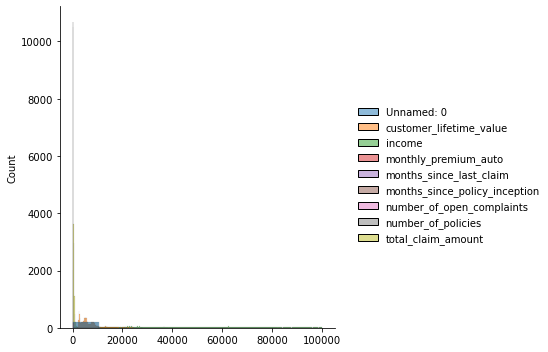

In [6]:
sns.displot(numerical)

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'monthly_premium_auto'}>,
        <AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>],
       [<AxesSubplot:title={'center':'number_of_open_complaints'}>,
        <AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>]],
      dtype=object)

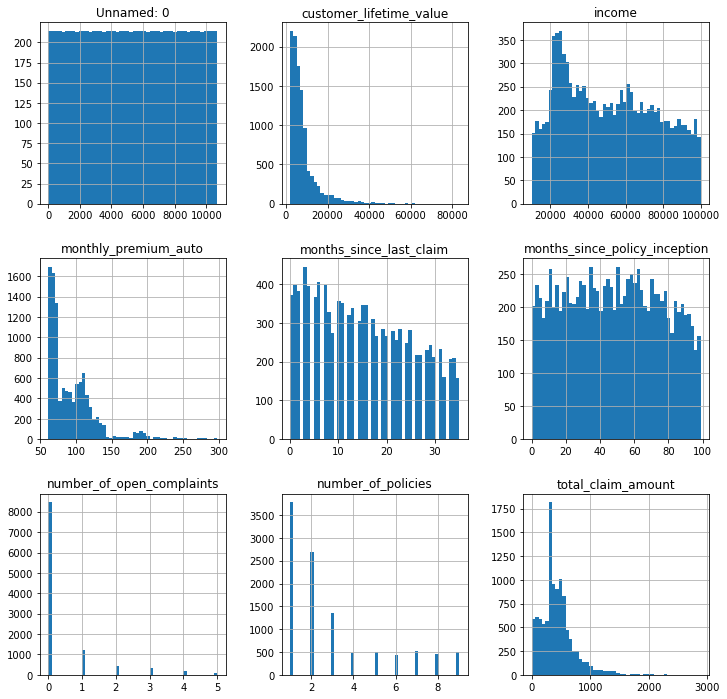

In [7]:
numerical.hist(figsize=(12,12), bins=50)

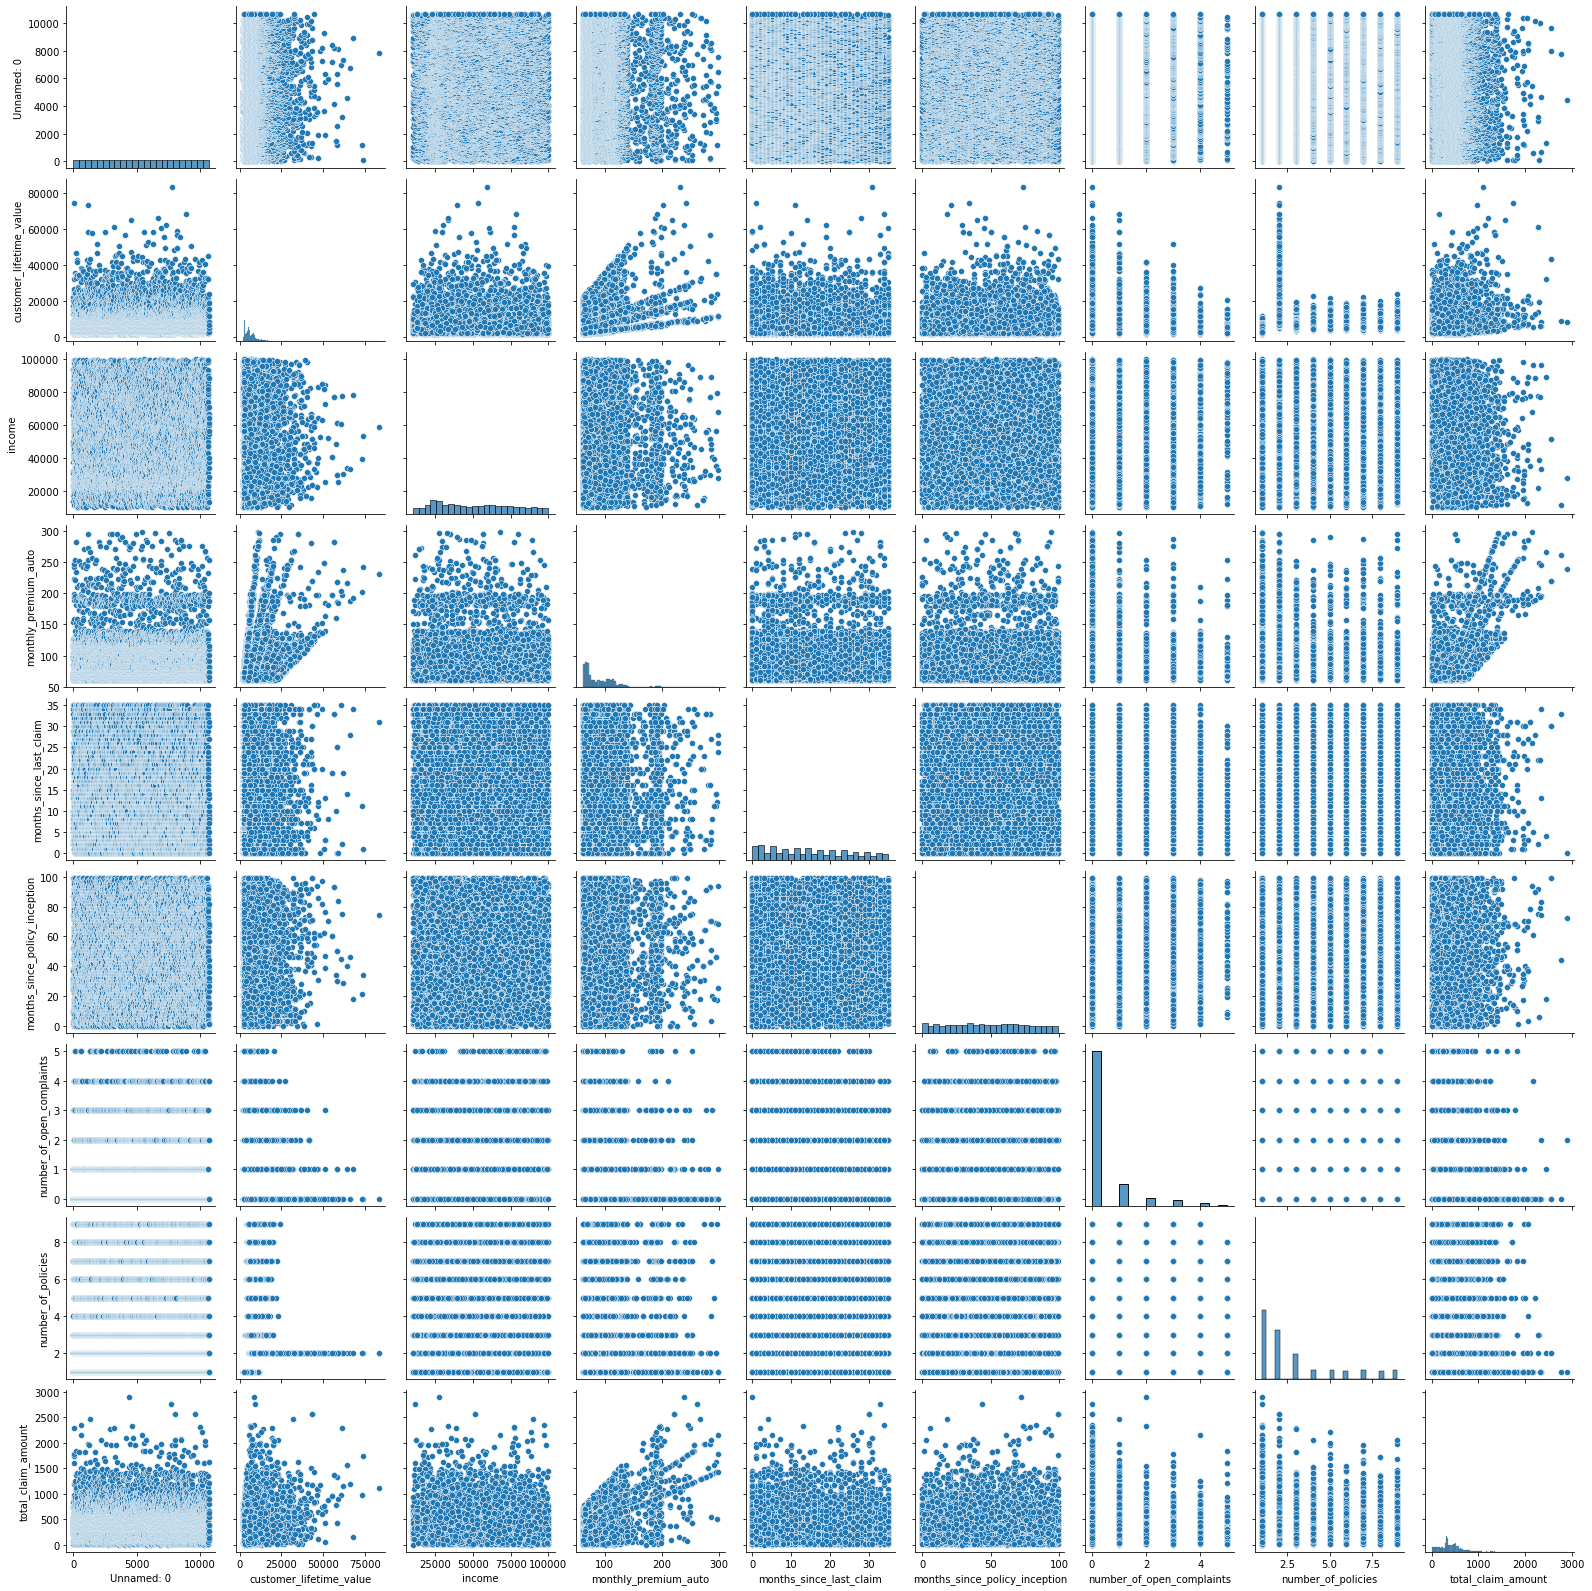

In [8]:
sns.pairplot(numerical)

- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable.

In [9]:
clean_df.corr()

Unnamed: 0  customer_lifetime_value    income  \
Unnamed: 0                       1.000000                 0.000914 -0.004264   
customer_lifetime_value          0.000914                 1.000000 -0.000276   
income                          -0.004264                -0.000276  1.000000   
monthly_premium_auto            -0.001076                 0.404235 -0.010804   
months_since_last_claim          0.009031                 0.012466 -0.018013   
months_since_policy_inception    0.013202                 0.017055  0.011509   
number_of_open_complaints        0.005535                -0.028099  0.013057   
number_of_policies               0.002737                 0.016789 -0.001515   
total_claim_amount              -0.003809                 0.232849 -0.118201   

                               monthly_premium_auto  months_since_last_claim  \
Unnamed: 0                                -0.001076                 0.009031   
customer_lifetime_value                    0.404235                 0.012466   
income                                    -0.010804                -0.018013   
monthly_premium_auto                       1.000000                 0.006959   
months_since_last_claim                    0.006959                 1.000000   
months_since_policy_inception              0.019696                -0.036883   
number_of_open_complaints                 -0.002423                -0.002617   
number_of_policies                        -0.018805                 0.006791   
total_claim_amount                         0.630149                 0.008979   

                               months_since_policy_inception  \
Unnamed: 0                                          0.013202   
customer_lifetime_value                             0.017055   
income                                              0.011509   
monthly_premium_auto                                0.019696   
months_since_last_claim                            -0.036883   
months_since_policy_inception                       1.000000   
number_of_open_complaints                           0.004368   
number_of_policies                                 -0.009719   
total_claim_amount                                  0.004186   

                               number_of_open_complaints  number_of_policies  \
Unnamed: 0                                      0.005535            0.002737   
customer_lifetime_value                        -0.028099            0.016789   
income                                          0.013057           -0.001515   
monthly_premium_auto                           -0.002423           -0.018805   
months_since_last_claim                        -0.002617            0.006791   
months_since_policy_inception                   0.004368           -0.009719   
number_of_open_complaints                       1.000000            0.002748   
number_of_policies                              0.002748            1.000000   
total_claim_amount                             -0.007332           -0.008019   

                               total_claim_amount  
Unnamed: 0                              -0.003809  
customer_lifetime_value                  0.232849  
income                                  -0.118201  
monthly_premium_auto                     0.630149  
months_since_last_claim                  0.008979  
months_since_policy_inception            0.004186  
number_of_open_complaints               -0.007332  
number_of_policies                      -0.008019  
total_claim_amount                       1.000000

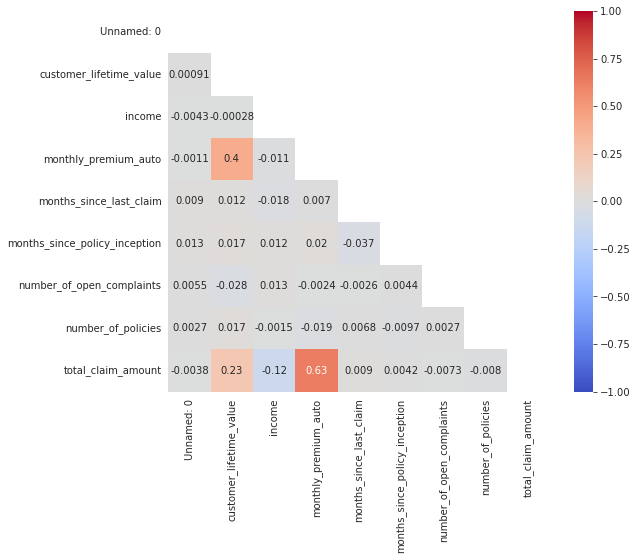

In [10]:
corr = clean_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

What we can estimate from this multicorlinearity chart is that a higher monthly premium payed by the customer will result in a customer lifetime value. With a probability a little smaller the customer will claim more, when their lifetime value is higher. This is expected as the monthly premium raises, when a customer claimed a lot. With a higher monthly premium the customer will most probably also claim more. This is expected as the value of the monthly premium is determined by the probability of a high claim_amount. 

Show a plot of the total number of responses.

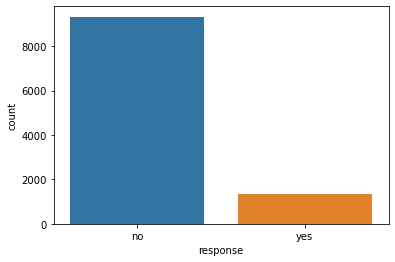

In [11]:
ax = sns.countplot(x="response", data=clean_df)

Show a plot of the response rate by the sales channel

In [12]:
clean_df['sales_channel'].value_counts()

agent          4019
branch         2975
call center    2099
web            1596
Name: sales_channel, dtype: int64

<AxesSubplot:title={'center':'Response rate by the sales channel'}, xlabel='sales_channel'>

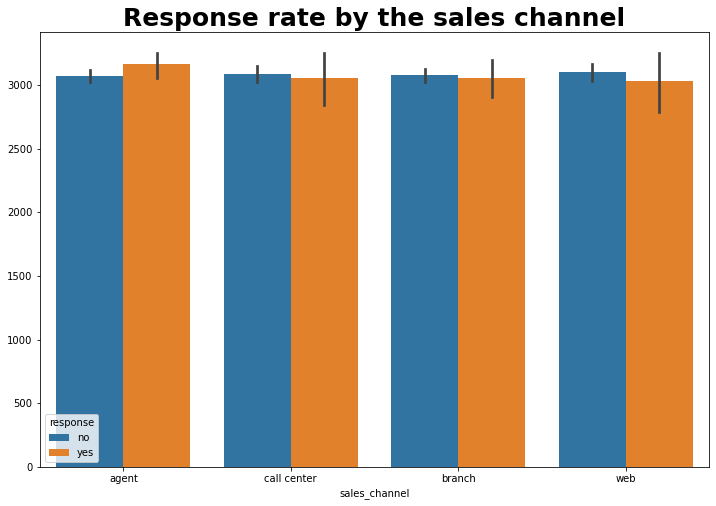

In [34]:
fig4, ax4 = plt.subplots(figsize = (12,8))
ax4.set_title('Response rate by the sales channel', size='25', fontweight='bold')
sns.barplot(x =clean_df['sales_channel'] , y = clean_df.index, hue = clean_df['response'], estimator= np.std , ax = ax4)

In [37]:
categorical

region response  coverage education effective_to_date month  \
0          central       no     basic   college           2/18/11   feb   
1      west region       no     basic   college           1/18/11   jan   
2             east       no     basic  bachelor           2/10/11   feb   
3       north west      yes  extended   college           1/11/11   jan   
4       north west       no   premium  bachelor           1/17/11   jan   
...            ...      ...       ...       ...               ...   ...   
10684      central       no   premium  bachelor           1/19/11   jan   
10685   north west       no     basic   college            1/6/11   jan   
10686      central       no  extended  bachelor            2/6/11   feb   
10687  west region       no   premium   college           2/13/11   feb   
10688  west region       no     basic  bachelor            1/8/11   jan   

      employment_status gender location_code marital_status     policy_type  \
0              employed      m      suburban        married  corporate auto   
1            unemployed      f      suburban         single   personal auto   
2              employed      m      suburban         single   personal auto   
3              employed      m      suburban         single  corporate auto   
4         medical leave      f      suburban        married   personal auto   
...                 ...    ...           ...            ...             ...   
10684        unemployed      f      suburban        married   personal auto   
10685          employed      f         urban        married   personal auto   
10686          employed      f         rural        married  corporate auto   
10687          employed      f         urban       divorced   personal auto   
10688        unemployed      m      suburban         single   personal auto   

             policy renew_offer_type sales_channel  vehicle_class vehicle_size  
0      corporate l3           offer3         agent  four-door car      medsize  
1       personal l3           offer4   call center  four-door car      medsize  
2       personal l3           offer3   call center            suv      medsize  
3      corporate l3           offer2        branch  four-door car      medsize  
4       personal l2           offer1        branch  four-door car      medsize  
...             ...              ...           ...            ...          ...  
10684   personal l1           offer3           web     luxury car      medsize  
10685   personal l3           offer2        branch  four-door car      medsize  
10686  corporate l3           offer1           web     luxury suv      medsize  
10687   personal l1           offer1        branch            suv      medsize  
10688   personal l1           offer4           web            suv      medsize  

[10689 rows x 16 columns]

<AxesSubplot:xlabel='sales_channel', ylabel='total_claim_amount'>

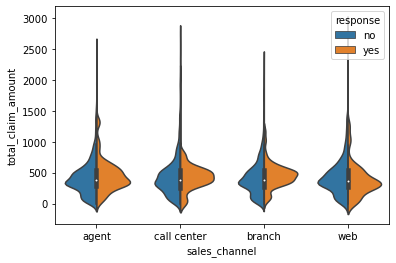

In [60]:
sns.violinplot(x =clean_df['sales_channel'], y = 'total_claim_amount', hue='response', data= clean_df, split=True)

C:\Users\Lenovo\anaconda3\envs\DA_Env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 93.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\anaconda3\envs\DA_Env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 88.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\anaconda3\envs\DA_Env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 92.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\anaconda3\envs\DA_Env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 87.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='sales_channel', ylabel='customer_lifetime_value'>

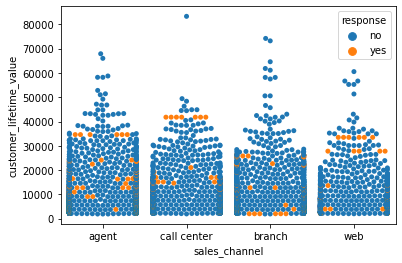

In [58]:
sns.swarmplot(x=clean_df['sales_channel'], y="customer_lifetime_value" ,hue="response", data=clean_df)

<AxesSubplot:xlabel='sales_channel', ylabel='income'>

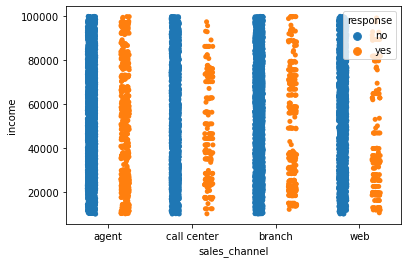

In [52]:
sns.stripplot(x='sales_channel', y="income", data=clean_df,  hue="response", jitter=True, dodge=True)

With high claim amount the agent seems most succesful in getting response. The web is also succesful with high total claim amounts. With low claim amounts it seems like the agent is not worse the money as call centers and web get a good amount.

Show a plot of the response rate by the total claim amount

<AxesSubplot:>

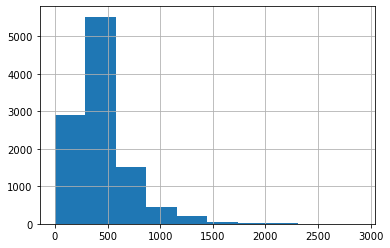

In [14]:
clean_df.loc[:,'total_claim_amount'].hist()

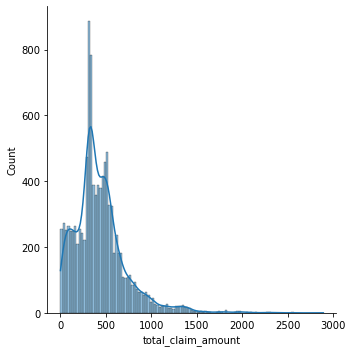

In [15]:
sns.displot(clean_df['total_claim_amount'], kde=True)

In [16]:
clean_df['total_claim_amount'][clean_df['response']=='no'].describe()

count    9328.000000
mean      432.593804
std       298.789449
min         0.000000
25%       253.000000
50%       377.000000
75%       547.000000
max      2893.000000
Name: total_claim_amount, dtype: float64

In [17]:
clean_df['total_claim_amount'][clean_df['response']=='yes'].describe()

count    1361.000000
mean      445.422483
std       245.366910
min         7.000000
25%       312.000000
50%       412.000000
75%       547.000000
max      2092.000000
Name: total_claim_amount, dtype: float64

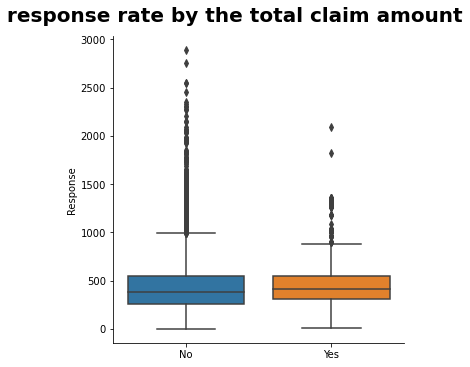

In [18]:
fg7 = sns.catplot(x='response', y = 'total_claim_amount', data = clean_df, kind="box", margin_titles = True)
fg7.fig.suptitle('response rate by the total claim amount', size='20', fontweight='bold', y = 1.05)
fg7.set_xticklabels(['No', 'Yes'])
fg7.set_ylabels('Response')
fg7.set_xlabels('')

Show a plot of the response rate by income

In [19]:
clean_df['income'][clean_df['response']=='no'].mean()

52402.58201114923

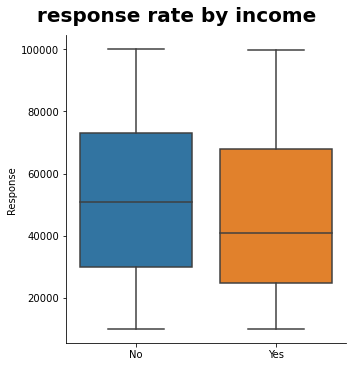

In [20]:
fg7 = sns.catplot(x='response', y = 'income', data = clean_df, kind="box", margin_titles = True)
fg7.fig.suptitle('response rate by income', size='20', fontweight='bold', y = 1.05)
fg7.set_xticklabels(['No', 'Yes'])
fg7.set_ylabels('Response')
fg7.set_xlabels('')

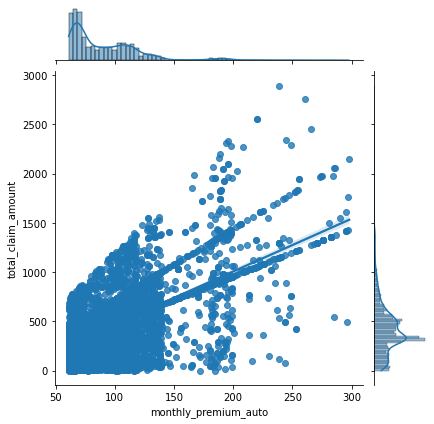

In [21]:
sns.jointplot(x='monthly_premium_auto', y='total_claim_amount', data=clean_df, kind='reg')

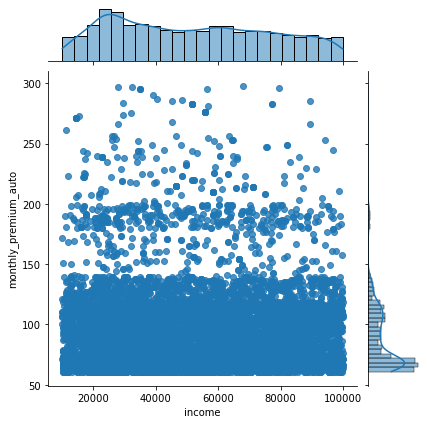

In [22]:
sns.jointplot(x='income', y='monthly_premium_auto', data=clean_df, kind='reg')

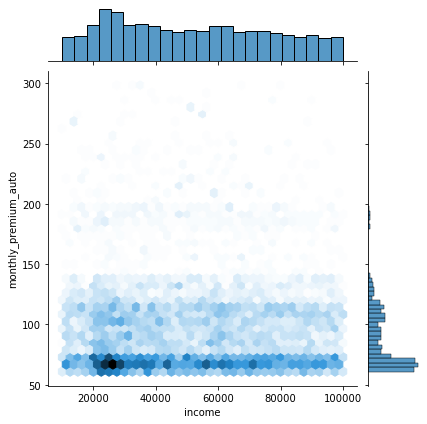

In [23]:
sns.jointplot(x='income', y='monthly_premium_auto', data=clean_df, kind='hex')

It seems that it doesn't matter how much income the customer has. They will mostly have the cheaper monthly rate. 

The more a customer pays per Month, the higher is the company gained by them.

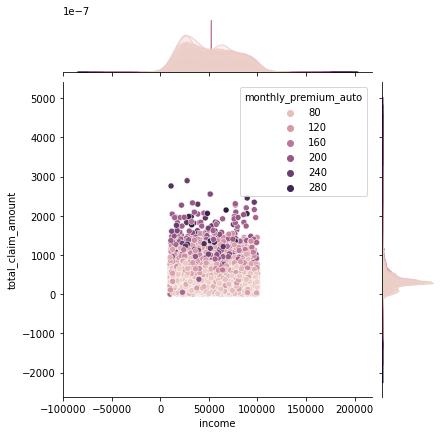

In [24]:
sns.jointplot(x='income', y='total_claim_amount', data=clean_df, hue ='monthly_premium_auto')

In [29]:
numerical.info()[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Unnamed: 0                     10689 non-null  int64
 1   customer_lifetime_value        10689 non-null  int64
 2   income                         10689 non-null  int64
 3   monthly_premium_auto           10689 non-null  int64
 4   months_since_last_claim        10689 non-null  int64
 5   months_since_policy_inception  10689 non-null  int64
 6   number_of_open_complaints      10689 non-null  int64
 7   number_of_policies             10689 non-null  int64
 8   total_claim_amount             10689 non-null  int64
dtypes: int64(9)
memory usage: 751.7 KB


TypeError: 'NoneType' object is not subscriptable

In [26]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   region             10689 non-null  object
 1   response           10689 non-null  object
 2   coverage           10689 non-null  object
 3   education          10689 non-null  object
 4   effective_to_date  10689 non-null  object
 5   month              10689 non-null  object
 6   employment_status  10689 non-null  object
 7   gender             10689 non-null  object
 8   location_code      10689 non-null  object
 9   marital_status     10689 non-null  object
 10  policy_type        10689 non-null  object
 11  policy             10689 non-null  object
 12  renew_offer_type   10689 non-null  object
 13  sales_channel      10689 non-null  object
 14  vehicle_class      10689 non-null  object
 15  vehicle_size       10689 non-null  object
dtypes: object(16)
memory usage: 1.3+ MB


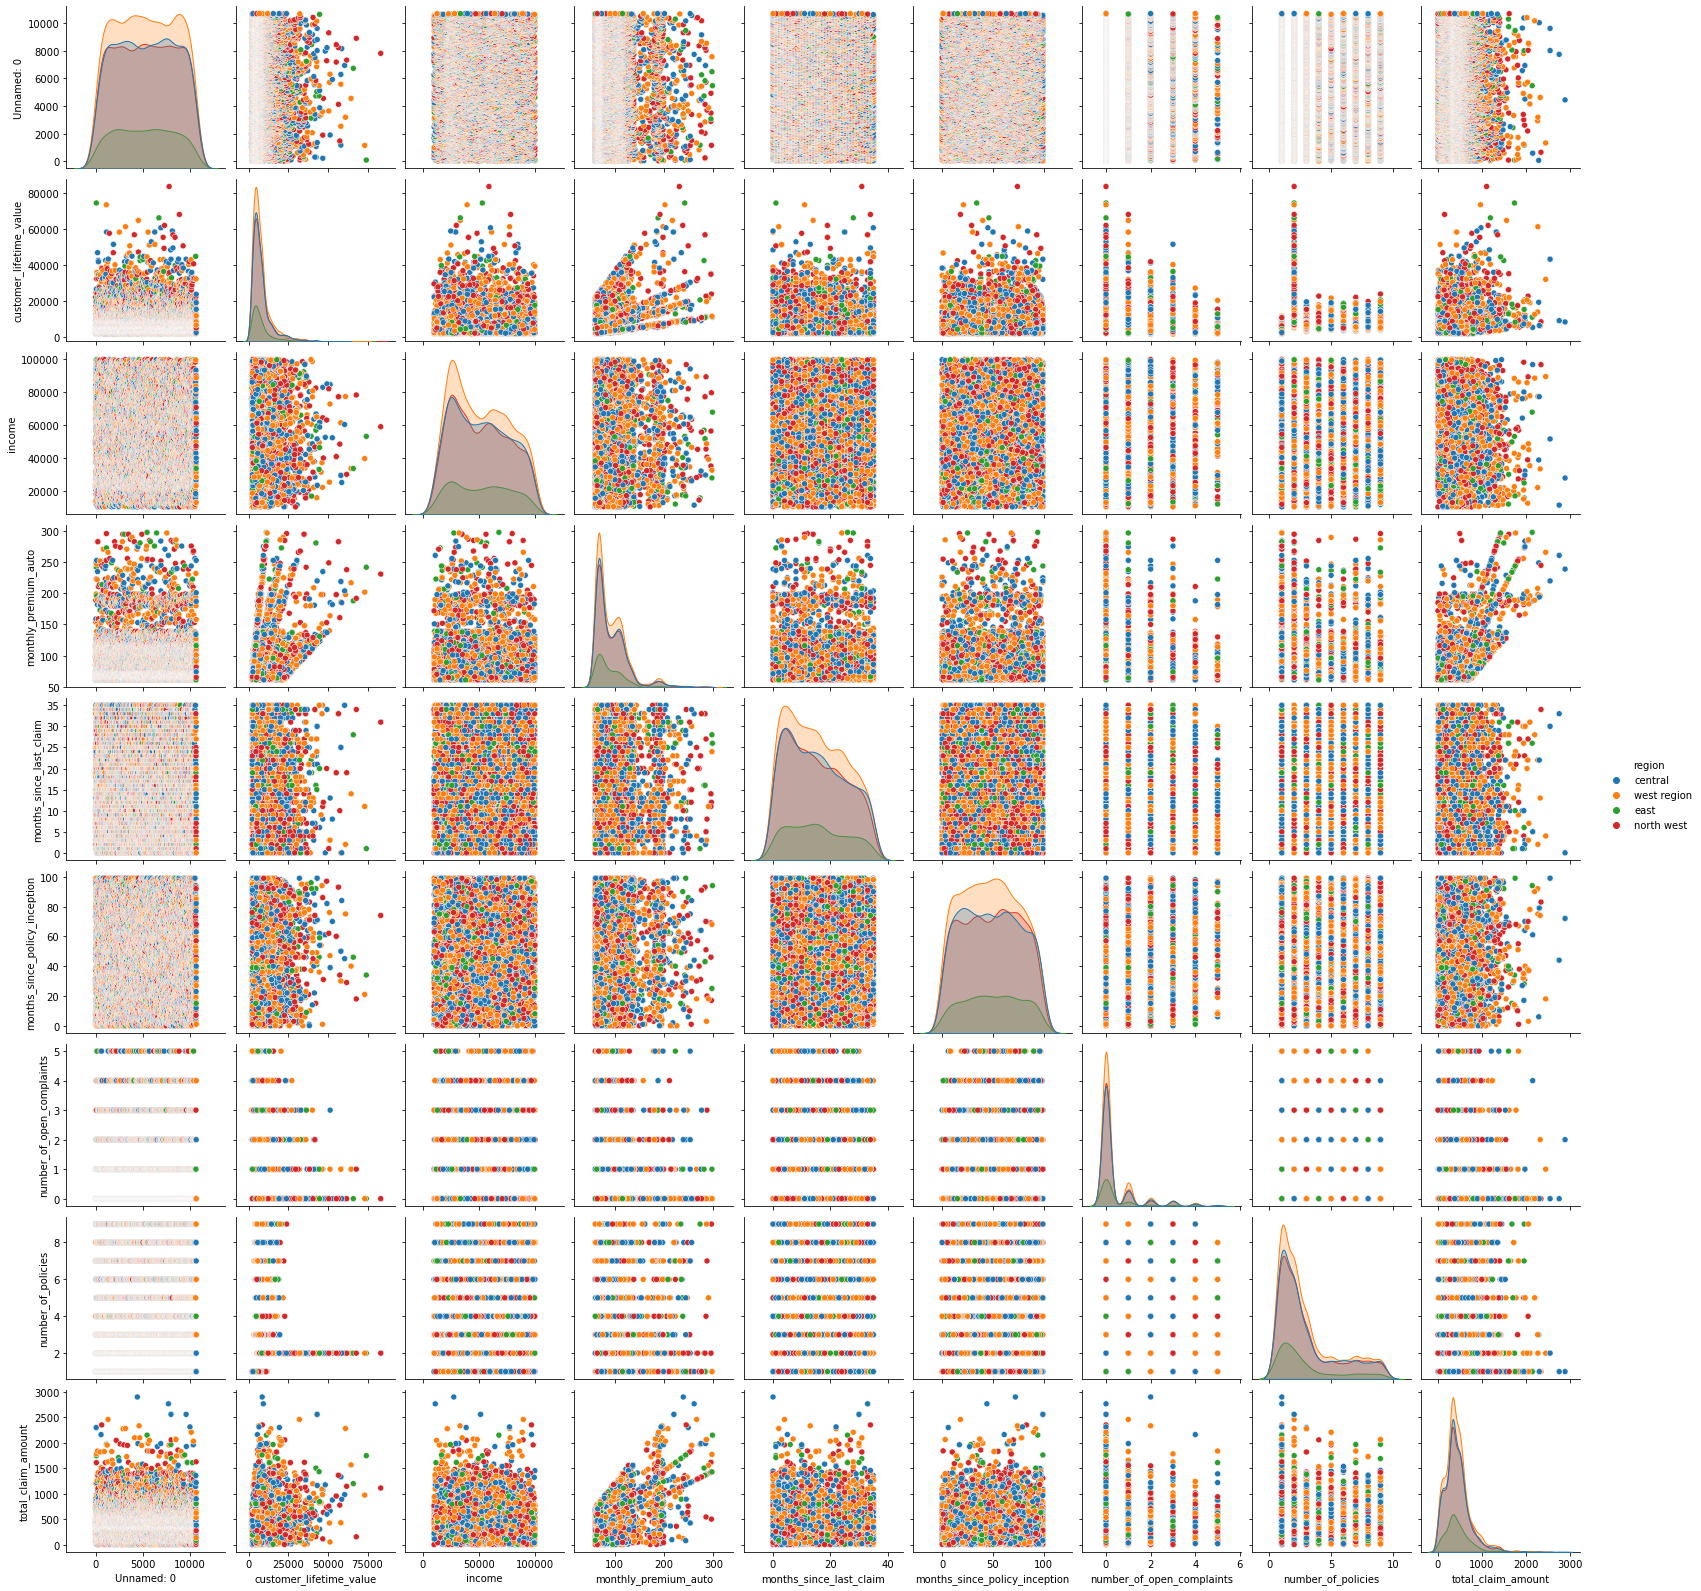

In [35]:
sns.pairplot(clean_df, hue='region')

In [36]:
for col in clean_df.columns:
    sns.pairplot(clean_df, hue=col)

C:\Users\Lenovo\anaconda3\envs\DA_Env\lib\site-packages\seaborn\axisgrid.py:1242: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000025550C509D0> (for post_execute):


KeyboardInterrupt: 